In [77]:
import pandas as pd 
import numpy as np 

df= pd.read_csv('heart_disease.csv')
df.head()
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [78]:
df.empty


False

In [79]:
df.tail(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [81]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [82]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [83]:
df = df.rename(columns=({'cp':'chest_pain_type', 
'trestbps':'bloodp_atrest',
'chol':'cholesterol', 
'fbs':'glucose_fasting', 
'thalach':'max_heart_rate', 
'exang':'angina_stres', 
'oldpeak':'heartstres_exercise', 
'slope':'slope_st', 
'ca':'vessel_colored', 
'thal':'thalium_result', 
'target':'heart_disease'}))
df.head()

,age,sex,chest_pain_type,bloodp_atrest,cholesterol,glucose_fasting,restecg,max_heart_rate,angina_stres,heartstres_exercise,slope_st,vessel_colored,thalium_result,heart_disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [84]:
df['heart_disease'] = pd.Categorical(df['heart_disease'], ordered=True)
df['thalium_result'] = pd.Categorical(df['thalium_result'], ordered=True)
df['vessel_colored'] = pd.Categorical(df['vessel_colored'], ordered=True)
df['slope_st'] = pd.Categorical(df['slope_st'], ordered=True)
df['heartstres_exercise'] = pd.Categorical(df['heartstres_exercise'], ordered=True)
df['angina_stres'] = pd.Categorical(df['angina_stres'], ordered=True)
df['restecg'] = pd.Categorical(df['restecg'], ordered=True)
df['glucose_fasting'] = pd.Categorical(df['glucose_fasting'], ordered=True)
df['chest_pain_type'] = pd.Categorical(df['chest_pain_type'], ordered=True)
df['sex'] = pd.Categorical(df['sex'])

df.describe(include='all')

,age,sex,chest_pain_type,bloodp_atrest,cholesterol,glucose_fasting,restecg,max_heart_rate,angina_stres,heartstres_exercise,slope_st,vessel_colored,thalium_result,heart_disease
count,303.000000,303.0,303.0,303.000000,303.000000,303.0,303.0,303.000000,303.0,303.0,303.0,303.0,303.0,303.0
unique,NaN,2.0,4.0,NaN,NaN,2.0,3.0,NaN,2.0,40.0,3.0,5.0,4.0,2.0
top,NaN,1.0,0.0,NaN,NaN,0.0,1.0,NaN,0.0,0.0,2.0,0.0,2.0,1.0
freq,NaN,207.0,143.0,NaN,NaN,258.0,152.0,NaN,204.0,99.0,142.0,175.0,166.0,165.0
mean,54.366337,NaN,NaN,131.623762,246.264026,NaN,NaN,149.646865,NaN,NaN,NaN,NaN,NaN,NaN
std,9.082101,NaN,NaN,17.538143,51.830751,NaN,NaN,22.905161,NaN,NaN,NaN,NaN,NaN,NaN
min,29.000000,NaN,NaN,94.000000,126.000000,NaN,NaN,71.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,47.500000,NaN,NaN,120.000000,211.000000,NaN,NaN,133.500000,NaN,NaN,NaN,NaN,NaN,NaN
50%,55.000000,NaN,NaN,130.000000,240.000000,NaN,NaN,153.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,61.000000,NaN,NaN,140.000000,274.500000,NaN,NaN,166.000000,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

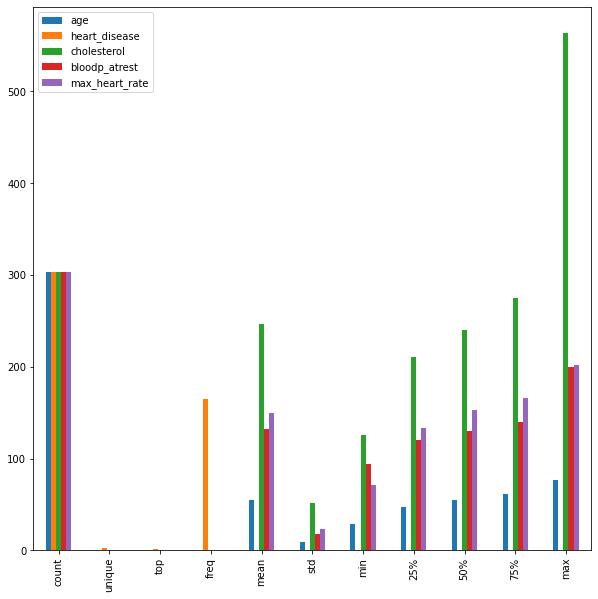

In [85]:
df[['age', 'heart_disease', 'cholesterol', 'bloodp_atrest', 'max_heart_rate']].describe(include='all').plot.bar(orientation='vertical',figsize=(10,10))

<AxesSubplot:>

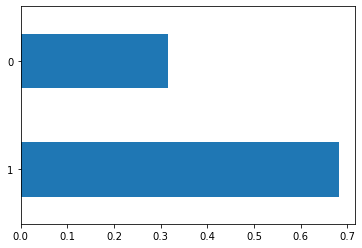

In [86]:
df.sex.value_counts(normalize=True)
df.sex.value_counts(normalize=True).plot.barh()

In [87]:
df.age.min()

29

In [88]:
df.age.max()

77

Heart disease are generally more frequent in elderly population in the next code snippet we'll select frome the data set a sub population with age under 40 and some parameter along with the column stating if a particular patiant has heart disease. We can see some correlation with the predicting healt parameter for heart disease with some exceptions. We analize in more depth two exception using some filtering and indexing.

In [89]:
df.loc[df.age<40, ['sex', 'heart_disease', 'cholesterol', 'glucose_fasting', 'max_heart_rate','slope_st']]

,sex,heart_disease,cholesterol,glucose_fasting,max_heart_rate,slope_st
1,1,1,250,0,187,0
44,1,1,321,0,182,2
58,1,1,182,0,174,2
65,0,1,183,0,182,2
72,1,1,204,0,202,2
115,0,1,215,0,170,2
124,0,1,199,0,179,2
125,0,1,210,0,192,2
154,0,1,220,0,152,1
157,1,1,192,0,174,2


In [90]:
df.loc[(df.max_heart_rate==187) & (df.cholesterol==250)]

,age,sex,chest_pain_type,bloodp_atrest,cholesterol,glucose_fasting,restecg,max_heart_rate,angina_stres,heartstres_exercise,slope_st,vessel_colored,thalium_result,heart_disease
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [91]:
df.iloc[239]

age                     35.0
sex                      1.0
chest_pain_type          0.0
bloodp_atrest          126.0
cholesterol            282.0
glucose_fasting          0.0
restecg                  0.0
max_heart_rate         156.0
angina_stres             1.0
heartstres_exercise      0.0
slope_st                 2.0
vessel_colored           0.0
thalium_result           3.0
heart_disease            0.0
Name: 239, dtype: float64

Now we ad a 'risk' variable that takes into consideration some methabolic parameters and classifies patients being at really high risk of heart disease.

In [92]:
df['risk'] = (df.cholesterol > 239) & (df.glucose_fasting == 1) & (df.bloodp_atrest > 150)

df.risk.describe()

count       303
unique        2
top       False
freq        299
Name: risk, dtype: object

<AxesSubplot:title={'center':'box plot of key variable'}>

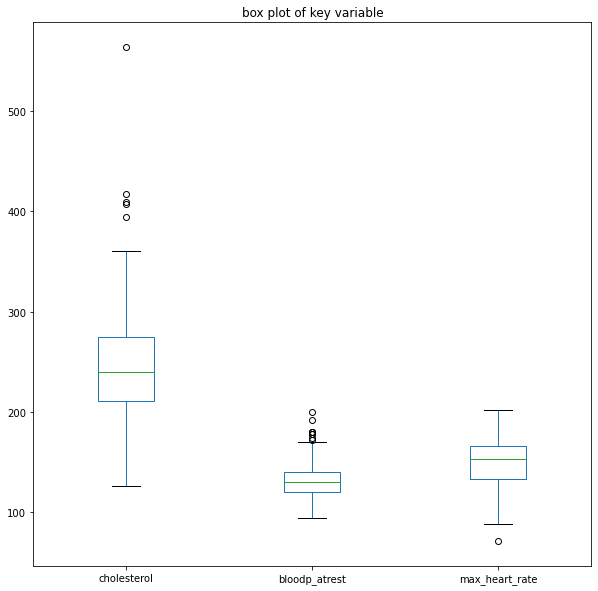

In [93]:
import matplotlib.pyplot as plt
df.plot.box( y= ['cholesterol', 'bloodp_atrest', 'max_heart_rate'], figsize= (10, 10),
         title= 'box plot of key variable')


In [94]:
df.rename(str.upper, axis='columns', inplace=True)
df.head()

,AGE,SEX,CHEST_PAIN_TYPE,BLOODP_ATREST,CHOLESTEROL,GLUCOSE_FASTING,RESTECG,MAX_HEART_RATE,ANGINA_STRES,HEARTSTRES_EXERCISE,SLOPE_ST,VESSEL_COLORED,THALIUM_RESULT,HEART_DISEASE,RISK
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,False
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,False
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,False
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,False
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,False


<AxesSubplot:>

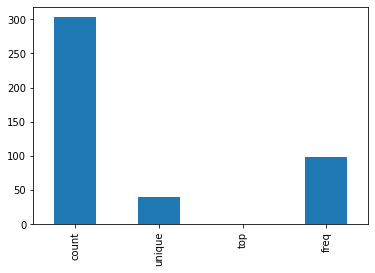

In [95]:
df.HEARTSTRES_EXERCISE.describe().plot.bar()

In [96]:
df['RISK'] = pd.Categorical(df['RISK'] ,ordered=True)

df.RISK.dtype
df.head()

,AGE,SEX,CHEST_PAIN_TYPE,BLOODP_ATREST,CHOLESTEROL,GLUCOSE_FASTING,RESTECG,MAX_HEART_RATE,ANGINA_STRES,HEARTSTRES_EXERCISE,SLOPE_ST,VESSEL_COLORED,THALIUM_RESULT,HEART_DISEASE,RISK
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,False
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,False
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,False
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,False
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,False


In [97]:
df4 = df.sort_values(by='HEARTSTRES_EXERCISE', ascending=True, inplace=True)


Take a subset to do some exercise

In [98]:
df1 = df4[['CHOLESTEROL','BLOODP_ATREST','MAX_HEART_RATE']].stack().unstack().sort_index()
df1.head()

TypeError: 'NoneType' object is not subscriptable

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   CHOLESTEROL     303 non-null    int64
 1   BLOODP_ATREST   303 non-null    int64
 2   MAX_HEART_RATE  303 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [ ]:
df2 = df.query(
    'CHOLESTEROL > 220'
    'and BLOODP_ATREST > 140'
    'and HEART_DISEASE==1'

)
df2.head()


,AGE,SEX,CHEST_PAIN_TYPE,BLOODP_ATREST,CHOLESTEROL,GLUCOSE_FASTING,RESTECG,MAX_HEART_RATE,ANGINA_STRES,HEARTSTRES_EXERCISE,SLOPE_ST,VESSEL_COLORED,THALIUM_RESULT,HEART_DISEASE,RISK
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,False
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1,False
17,66,0,3,150,226,0,1,114,0,2.6,0,0,2,1,False
18,43,1,0,150,247,0,1,171,0,1.5,2,0,2,1,False
23,61,1,2,150,243,1,1,137,1,1.0,1,0,2,1,False


In [ ]:
def get_row_count(*dfs):
    return[df.shape[0] for df in dfs]

get_row_count(df2, df)    

[21, 303]

In [ ]:
df3 = df1.merge(
    df2, 
   
)
np.array_equal(df3.sort_index(axis=1).values, df2.sort_index(axis=1).values)


True

In [ ]:
df= df.assign(
    z_score_cholesterol= lambda x: x.CHOLESTEROL.sub(df.CHOLESTEROL.mean()).div(df.CHOLESTEROL.std()).abs()
).head()
df.head()


,AGE,SEX,CHEST_PAIN_TYPE,BLOODP_ATREST,CHOLESTEROL,GLUCOSE_FASTING,RESTECG,MAX_HEART_RATE,ANGINA_STRES,HEARTSTRES_EXERCISE,SLOPE_ST,VESSEL_COLORED,THALIUM_RESULT,HEART_DISEASE,RISK,z_score_cholesterol
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,False,0.255910
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,False,0.072080
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,False,0.815424
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,False,0.198030
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,False,2.078611


The following plot can give us some insight into the data set, we can see how the blood pressure at rest, cholesterol and max heart rate changes in relation to age increase.

<AxesSubplot:xlabel='AGE'>

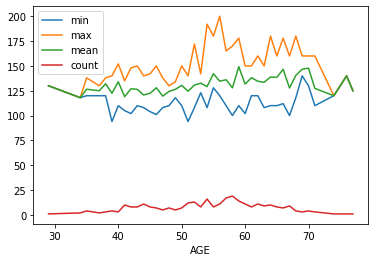

In [ ]:
l = df.groupby('AGE')['BLOODP_ATREST'].agg(['min','max','mean','count'])

l.plot.line()

<AxesSubplot:xlabel='AGE'>

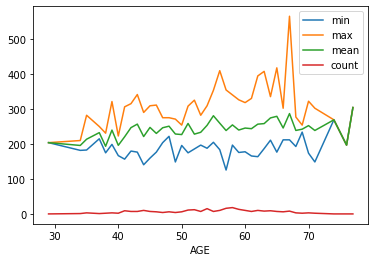

In [ ]:
m = df.groupby('AGE')['CHOLESTEROL'].agg(['min','max','mean','count'])

m.plot.line()

<AxesSubplot:xlabel='AGE'>

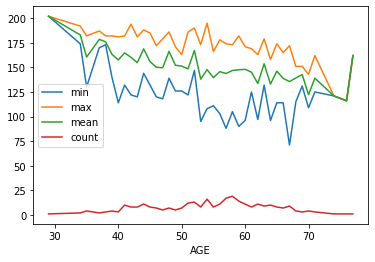

In [ ]:
n = df.groupby('AGE')['MAX_HEART_RATE'].agg(['min','max','mean','count'])

n.plot.line()

In [ ]:
pd.crosstab(index=df.THALIUM_RESULT, columns=df.HEART_DISEASE, colnames=['HEART_DISEASE'])


HEART_DISEASE,0,1
THALIUM_RESULT,,
0,1,1
1,12,6
2,36,130
3,89,28


<AxesSubplot:xlabel='SLOPE_ST'>

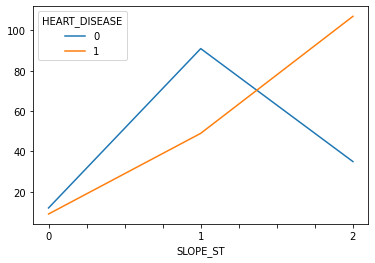

In [ ]:
pd.crosstab(index=df.SLOPE_ST, columns=df.HEART_DISEASE, colnames=['HEART_DISEASE']).plot()


<AxesSubplot:xlabel='CHEST_PAIN_TYPE'>

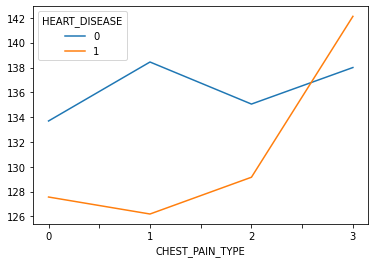

In [ ]:
pd.crosstab(index=df.CHEST_PAIN_TYPE, columns=df.HEART_DISEASE, colnames=['HEART_DISEASE'], values=df.BLOODP_ATREST, aggfunc='mean').plot()


<AxesSubplot:xlabel='MAX_HEART_RATE', ylabel='BLOODP_ATREST'>

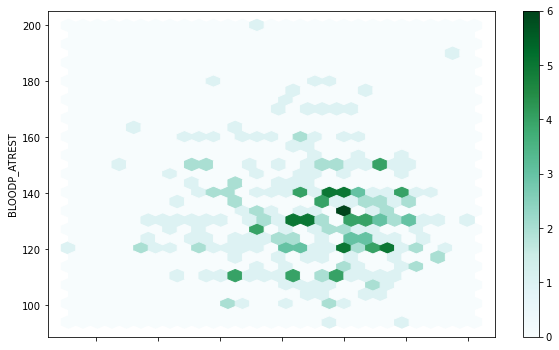

In [ ]:
df.plot(x='MAX_HEART_RATE', y='BLOODP_ATREST', kind='hexbin', gridsize=28, figsize=(10,6))


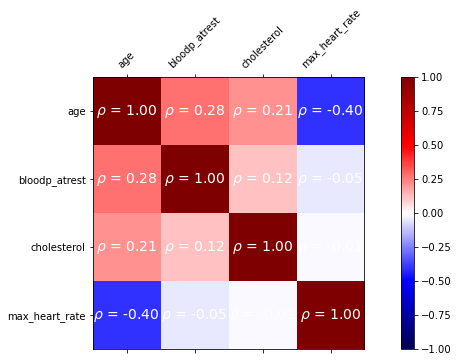

In [ ]:
fig, ax = plt.subplots(figsize=(13, 5))
df_corr=df.corr()

im = ax.matshow(df_corr, cmap='seismic')
im.set_clim(-1, 1) # set the bounds of the color scale
fig.colorbar(im) # add the colorbar to the figure

labels = [col.lower() for col in df_corr.columns]
ax.set_xticks(ax.get_xticks()[1:-1]) # to handle matplotlib bug
ax.set_xticklabels(labels, rotation=45)
ax.set_yticks(ax.get_yticks()[1:-1]) # to handle matplotlib bug
ax.set_yticklabels(labels)

for (i, j), coef in np.ndenumerate(df_corr): 
 ax.text(
 i, j, 
 fr'$\rho$ = {coef:.2f}', # raw (r), format (f) string
 ha='center', va='center', 
 color='white', fontsize=14
 )


<AxesSubplot:title={'center':'Combinations of health parameter and heart disease (value counts)'}, ylabel='SLOPE_ST,VESSEL_COLORED,THALIUM_RESULT,HEART_DISEASE'>

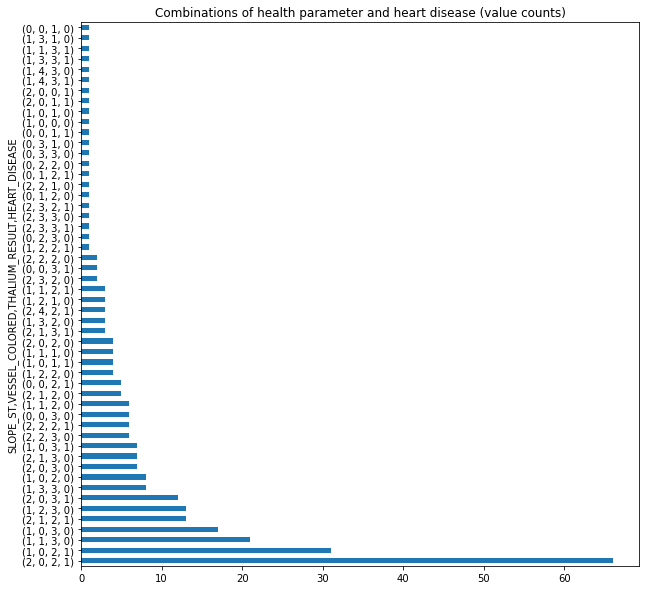

In [ ]:
df5=df.iloc[:,10:14].value_counts()
df5.plot(
    y=['SLOPE_ST','VESSEL_COLORED','THALIUM_RESULT','HEART_DISEASE'],
    kind='barh',
    figsize=(10,10),
    title=('Combinations of health parameter and heart disease (value counts)'),
)

<AxesSubplot:title={'center':'Combinations of health parameter related to heart disease (value counts)'}, ylabel='SLOPE_ST,VESSEL_COLORED,THALIUM_RESULT'>

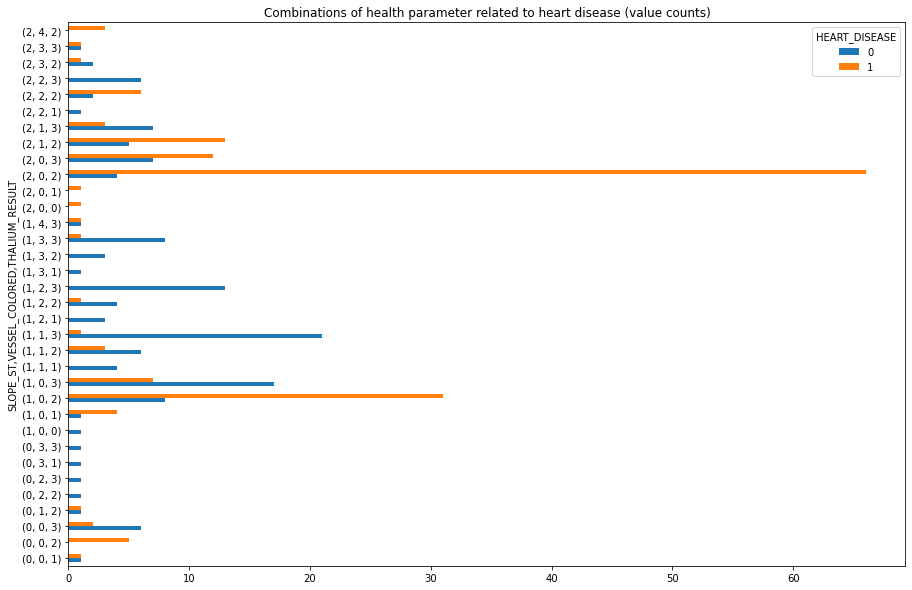

In [ ]:
df5.unstack().plot.barh(figsize=(15,10), title=('Combinations of health parameter related to heart disease (value counts)'))

array([[<AxesSubplot:xlabel='AGE', ylabel='AGE'>,
        <AxesSubplot:xlabel='BLOODP_ATREST', ylabel='AGE'>,
        <AxesSubplot:xlabel='CHOLESTEROL', ylabel='AGE'>,
        <AxesSubplot:xlabel='MAX_HEART_RATE', ylabel='AGE'>],
       [<AxesSubplot:xlabel='AGE', ylabel='BLOODP_ATREST'>,
        <AxesSubplot:xlabel='BLOODP_ATREST', ylabel='BLOODP_ATREST'>,
        <AxesSubplot:xlabel='CHOLESTEROL', ylabel='BLOODP_ATREST'>,
        <AxesSubplot:xlabel='MAX_HEART_RATE', ylabel='BLOODP_ATREST'>],
       [<AxesSubplot:xlabel='AGE', ylabel='CHOLESTEROL'>,
        <AxesSubplot:xlabel='BLOODP_ATREST', ylabel='CHOLESTEROL'>,
        <AxesSubplot:xlabel='CHOLESTEROL', ylabel='CHOLESTEROL'>,
        <AxesSubplot:xlabel='MAX_HEART_RATE', ylabel='CHOLESTEROL'>],
       [<AxesSubplot:xlabel='AGE', ylabel='MAX_HEART_RATE'>,
        <AxesSubplot:xlabel='BLOODP_ATREST', ylabel='MAX_HEART_RATE'>,
        <AxesSubplot:xlabel='CHOLESTEROL', ylabel='MAX_HEART_RATE'>,
        <AxesSubplot:xlabel='MAX_HEAR

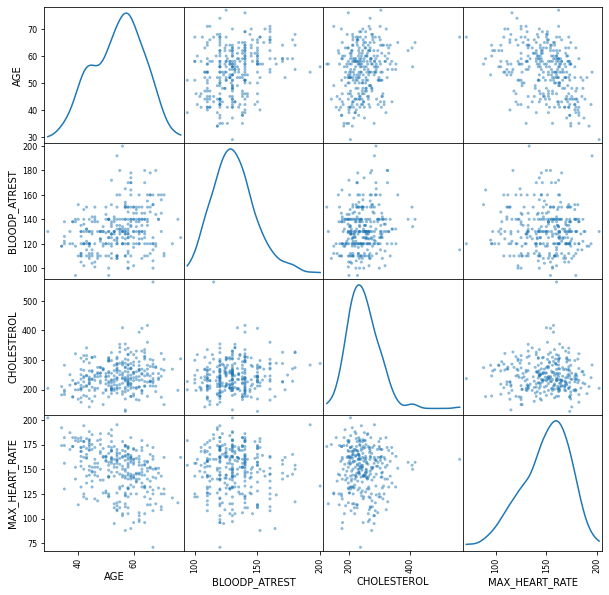

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(10,10), diagonal='kde')

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

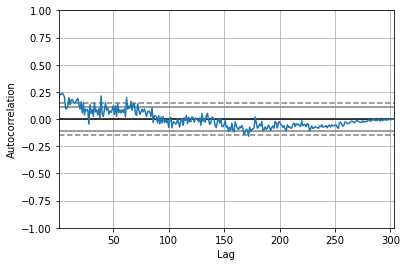

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df.MAX_HEART_RATE)

In [ ]:
import seaborn as sns 
sns.swarmplot(
    x='VESSEL_COLORED',
    y='CHOLESTEROL',
    hue='HEART_DISEASE',
    data=df
)

ValueError: Could not interpret input 'VESSEL_COLORED'

<AxesSubplot:>

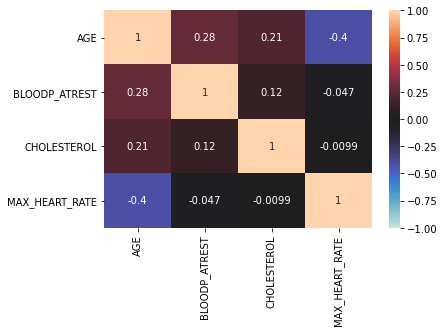

In [ ]:
sns.heatmap(
    df.sort_index().corr(),
    annot=True, 
    center=0, 
    vmin=-1, 
    vmax=1
    )